**Rizky Mahendra Trijayanto**

# **Mengunduh file ke dalam colab**

In [2]:
import tensorflow as tf

#Mengunduh file ke dalam colab
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-27 10:02:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.48MB/s    in 4m 16s  

2021-05-27 10:06:38 (1.20 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



# **Mengekstrak dataset**

In [3]:
import zipfile,os

local_zip = '/content/rockpaperscissors.zip'                                      
zip_ref = zipfile.ZipFile(local_zip, 'r')                                         
zip_ref.extractall('/content/')                                                   
zip_ref.close()         

# **Melihat jumlah gambar yang ada**

In [4]:
print('Total gambar batu:', len(os.listdir('/content/rockpaperscissors/rock')))            #Menampilkan jumlah gambar di dalam folder Gunting
print('Total gambar kertas:', len(os.listdir('/content/rockpaperscissors/paper')))         #Menampilkan jumlah gambar di dalam folder Batu
print('Total gambar gunting:', len(os.listdir('/content/rockpaperscissors/scissors')))     #Menampilkan jumlah gambar di dalam folder Kertas

Total gambar batu: 726
Total gambar kertas: 712
Total gambar gunting: 750


# **Membuat directory baru sebagai directory utama**

In [5]:
os.mkdir('/content/rockpaperscissors/data/')

# **Menyalin berkas yang ada pada rps-cv-images ke directory data**

In [6]:
import shutil

src = '/content/rockpaperscissors/rps-cv-images'
dst = '/content/rockpaperscissors/data/all'

shutil.copytree(src=src,dst=dst)

'/content/rockpaperscissors/data/all'

# **Menghapus berkas yang tidak diinginkan**

In [7]:
import os

#file name
file = 'README_rpc-cv-images.txt'
    
# File location 
location = '/content/rockpaperscissors/data/all'
    
# Path 
path = os.path.join(location, file) 
    
# Remove the file 
# 'file.txt' 
os.remove(path) 

# **Melakukan augmentasi**

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(
                    rescale = 1./255,                                                          
	    rotation_range=45,                                                                 
      width_shift_range=0.2,                                                      
      height_shift_range=0.2,                                                     
      shear_range=0.2,                                                            
      zoom_range=0.2,                                                             
      horizontal_flip=True,                                                        
      fill_mode='nearest',                                                         
#memecah data validation dan training     
      validation_split=0.4                                                        #60% validation
      )

dir = '/content/rockpaperscissors/data/all'

train_generator = train_datagen.flow_from_directory(                           
	dir,                                                                      
	target_size=(150,150),
  batch_size= 34,                                                          
  class_mode='categorical',                                                       
  shuffle=True,                                                                   
  subset='training'                                                               
  )

validation_generator = train_datagen.flow_from_directory(                      
	dir,                                                                      
	target_size=(150,150),
  batch_size= 34,                                                         
  class_mode='categorical',                                                       
  shuffle=True,
  subset='validation'                                                             
  )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# **Melakukan Callback**

In [23]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.9):
      print("\nAKURASI MENCAPAI 95%")
      self.model.stop_training = True

callbacks = myCallback()


# **Membangun Neural Network**

In [43]:
model = tf.keras.models.Sequential([                                              #model sequential
                                                                                  
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), #Layer Konvolusi pertama
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                         #Layer Konvolusi kedua
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),                         #Layer Konvolusi ketiga
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),                         #Layer Konvolusi keempat
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                    
    tf.keras.layers.Dropout(0.5),
                               
    tf.keras.layers.Dense(512, activation='relu'),                                #Hiden layer 512 neuron
    tf.keras.layers.Dense(3, activation='softmax')                                #Layer output
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [44]:
from tensorflow.keras.optimizers import RMSprop
# compile model dengan 'rmsprop' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# **Melatih Model**

In [45]:
history=model.fit(
    train_generator,
    steps_per_epoch=39,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=25, 
    verbose=2,
      callbacks=[callbacks]
    )

Epoch 1/30
39/39 - 14s - loss: 1.1942 - accuracy: 0.3881 - val_loss: 1.0747 - val_accuracy: 0.4447
Epoch 2/30
39/39 - 13s - loss: 1.0023 - accuracy: 0.4909 - val_loss: 0.9515 - val_accuracy: 0.4941
Epoch 3/30
39/39 - 13s - loss: 0.8682 - accuracy: 0.6248 - val_loss: 0.8086 - val_accuracy: 0.6341
Epoch 4/30
39/39 - 13s - loss: 0.6743 - accuracy: 0.7009 - val_loss: 0.5516 - val_accuracy: 0.7776
Epoch 5/30
39/39 - 13s - loss: 0.5981 - accuracy: 0.7740 - val_loss: 0.3207 - val_accuracy: 0.9071
Epoch 6/30
39/39 - 13s - loss: 0.4194 - accuracy: 0.8356 - val_loss: 0.3116 - val_accuracy: 0.9082
Epoch 7/30
39/39 - 13s - loss: 0.3893 - accuracy: 0.8820 - val_loss: 0.3072 - val_accuracy: 0.8835
Epoch 8/30
39/39 - 13s - loss: 0.3009 - accuracy: 0.8935 - val_loss: 0.2065 - val_accuracy: 0.9388
Epoch 9/30
39/39 - 13s - loss: 0.3059 - accuracy: 0.8950 - val_loss: 0.1918 - val_accuracy: 0.9365
Epoch 10/30
39/39 - 13s - loss: 0.2310 - accuracy: 0.9186 - val_loss: 0.3146 - val_accuracy: 0.9035
Epoch 11/

# **Plot Akurasi dan Loss pada Data Training dan Validation**

<Figure size 432x288 with 0 Axes>

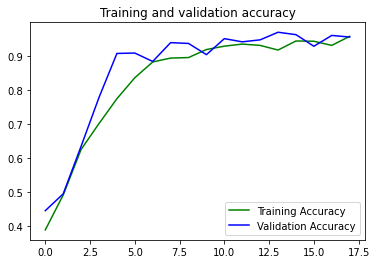

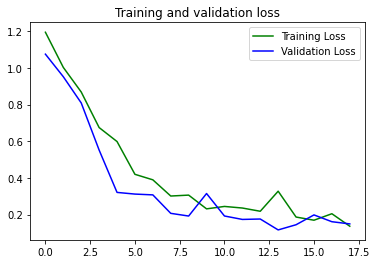

<Figure size 432x288 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt

# set untuk accuracy pada training dan validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


# set untuk loss pada training dan validation
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training dan validation accuracy per epoch
plt.plot(epochs, acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0) 
plt.figure()

# Plot training dan validation loss per epoch
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0) 
plt.figure()

# **Uji Coba Klasifikasi Gambar**

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL (1).png
0ePX1wuCc3et7leL.png
Tangan Anda menunjukkan gunting


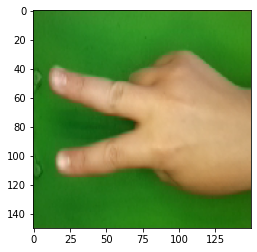

In [49]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)

  if classes[0,0]!=0:
    print('Tangan Anda menunjukkan kertas')
  elif classes[0,1]!=0:
    print('Tangan Anda menunjukkan batu')
  else:
    print('Tangan Anda menunjukkan gunting')